# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import json
from scipy.stats import linregress
import scipy.stats as st
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
#pprint(f"Number of cities in the list: {cities}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
       # pprint(city_weather) 
      
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
       
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

  # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | olonkinbyen
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | mawu
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | dudinka
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | sao vicente
Processing Record 13 of Set 1 | kristiansund
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | wailua homesteads
Processing Record 16 of Set 1 | margaret river
Processing Record 17 of Set 1 | taoudenni
Processing Record 18 of Set 1 | atafu village
Processing Record 19 of Set 1 | badger
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | 'ohonua
City not found. Skipping...
Processi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) 

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,285.17,41,35,0.89,US,1730059744
1,olonkinbyen,70.9221,-8.7187,267.70,83,100,19.58,SJ,1730059984
2,iqaluit,63.7506,-68.5145,267.00,79,75,5.14,CA,1730059986
3,port-aux-francais,-49.3500,70.2167,274.68,61,100,11.59,TF,1730059987
4,mawu,34.4307,104.9176,276.23,76,39,2.05,CN,1730059988


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,285.17,41,35,0.89,US,1730059744
1,olonkinbyen,70.9221,-8.7187,267.70,83,100,19.58,SJ,1730059984
2,iqaluit,63.7506,-68.5145,267.00,79,75,5.14,CA,1730059986
3,port-aux-francais,-49.3500,70.2167,274.68,61,100,11.59,TF,1730059987
4,mawu,34.4307,104.9176,276.23,76,39,2.05,CN,1730059988


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

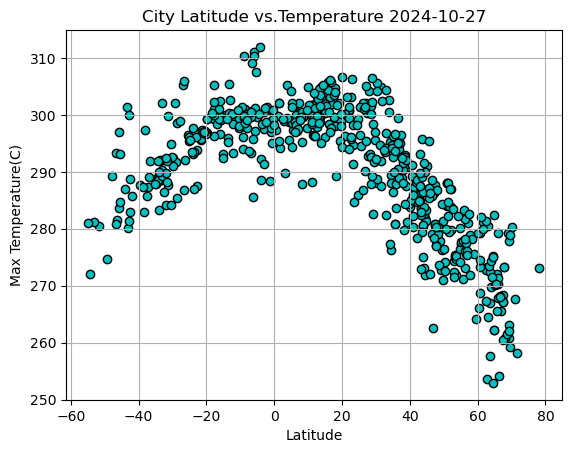

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],marker='o',facecolor= 'c',edgecolor='black')
current_time = time.localtime()
formatted_date = time.strftime("%Y-%m-%d", current_time)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title(f"City Latitude vs.Temperature {formatted_date}")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

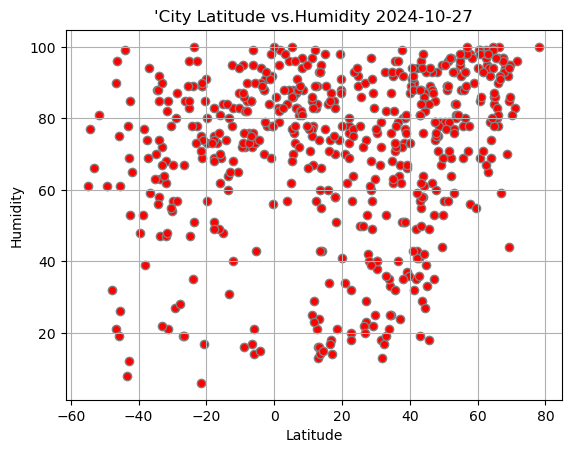

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],marker='o',facecolor= 'red',edgecolor='grey')
current_time = time.localtime()
formatted_date = time.strftime("%Y-%m-%d", current_time)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f"'City Latitude vs.Humidity {formatted_date}")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

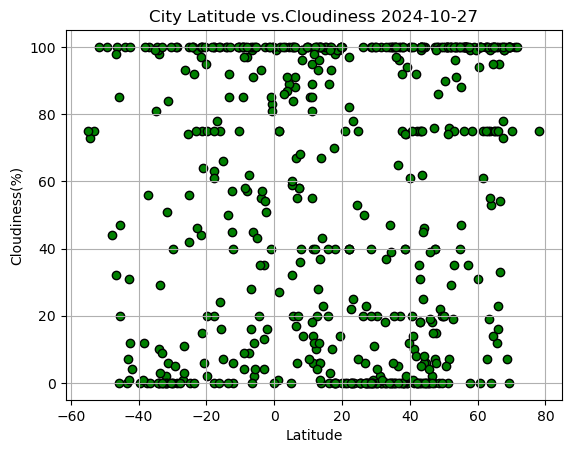

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o',facecolor= 'green', edgecolor='black')
current_time = time.localtime()
formatted_date = time.strftime("%Y-%m-%d", current_time)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title(f"City Latitude vs.Cloudiness {formatted_date}")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

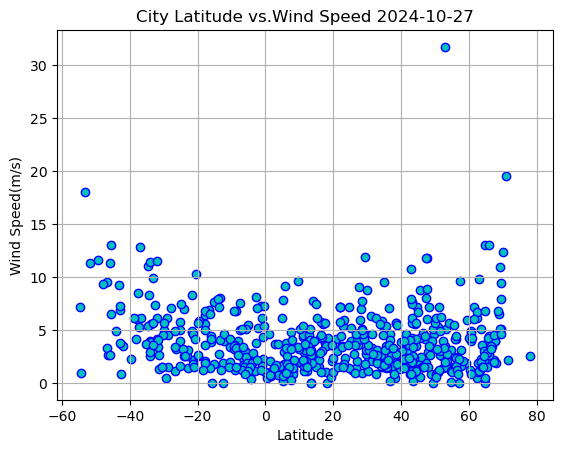

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o',facecolor= 'c', edgecolor='blue')
current_time = time.localtime()
formatted_date = time.strftime("%Y-%m-%d", current_time)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.title(f"City Latitude vs.Wind Speed {formatted_date}")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [31]:
# Define a function to create Linear Regression plots
def linear_reg(x_axis, y_axis,eq_loc):  
    correlation = st.pearsonr(x_axis,y_axis)
    p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
    p_fit = p_slope * x_axis + p_int
    eq= f"y ={p_slope: .2f}x +{ p_int: .2f}"
       
    #Plot the line
    plt.scatter(x_axis, y_axis ,marker="o")
    plt.plot(x_axis,p_fit,"--", color='red')
    plt.annotate(eq, eq_loc, fontsize=12, color='red')
    print(f"The r-value between {x_axis.name} and {y_axis.name} is {round(correlation[0],2)}")

In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
weather_df = pd.DataFrame(city_data_df)

northern_hemi_df = weather_df[weather_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,285.17,41,35,0.89,US,1730059744
1,olonkinbyen,70.9221,-8.7187,267.70,83,100,19.58,SJ,1730059984
2,iqaluit,63.7506,-68.5145,267.00,79,75,5.14,CA,1730059986
4,mawu,34.4307,104.9176,276.23,76,39,2.05,CN,1730059988
6,dudinka,69.4058,86.1778,260.91,95,100,7.92,RU,1730059990


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
weather_df = pd.DataFrame(city_data_df)

southern_hemi_df = weather_df[weather_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,port-aux-francais,-49.3500,70.2167,274.68,61,100,11.59,TF,1730059987
5,adamstown,-25.0660,-130.1015,295.39,83,42,5.72,PN,1730059989
8,waitangi,-43.9535,-176.5597,286.94,99,100,4.92,NZ,1730059992
9,lebu,-37.6167,-73.6500,285.76,74,0,8.53,CL,1730059994
10,sao vicente,-23.9631,-46.3919,293.13,35,100,2.57,BR,1730059995


###  Temperature vs. Latitude Linear Regression Plot

The r-value between Lat and Max Temp is -0.86


Text(0, 0.5, 'Max Temp')

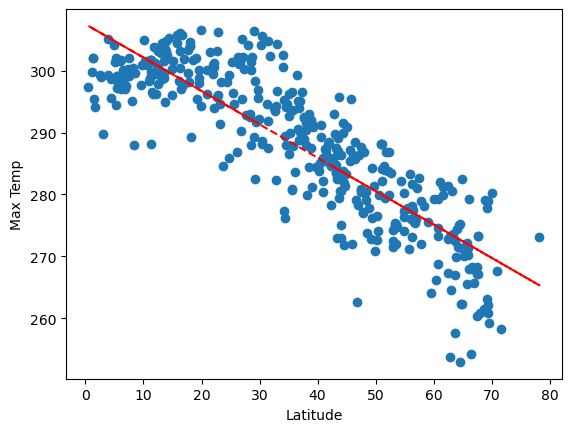

In [60]:
# Linear regression on Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],(200, 275))
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

The r-value between Lat and Max Temp is 0.68


Text(0, 0.5, 'Max Temp')

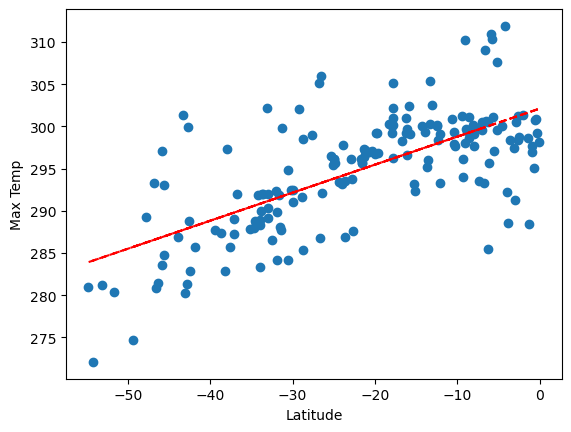

In [62]:
# Linear regression on Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],(200, 295))
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

**Discussion about the linear relationship:** The contrasting r-values highlight significant differences in climate dynamics between the two hemispheres. The Northern Hemisphere shows a clear pattern of cooler temperatures at higher latitudes, while the Southern Hemisphere exhibits a more complex relationship.

### Humidity vs. Latitude Linear Regression Plot

The r-value between Lat and Humidity is 0.22


Text(0, 0.5, 'Humidity(%)')

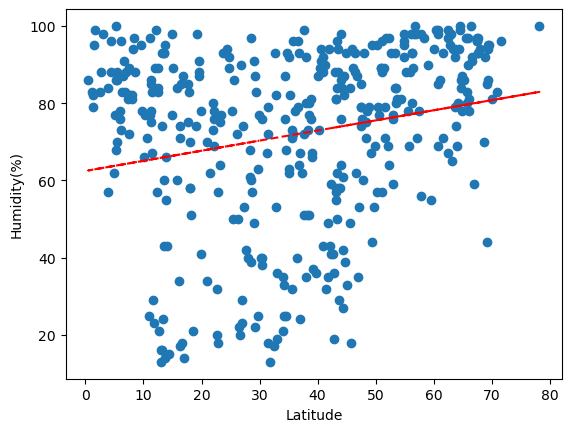

In [56]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],(99, 10))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

The r-value between Lat and Humidity is 0.24


Text(0, 0.5, 'Humidity(%)')

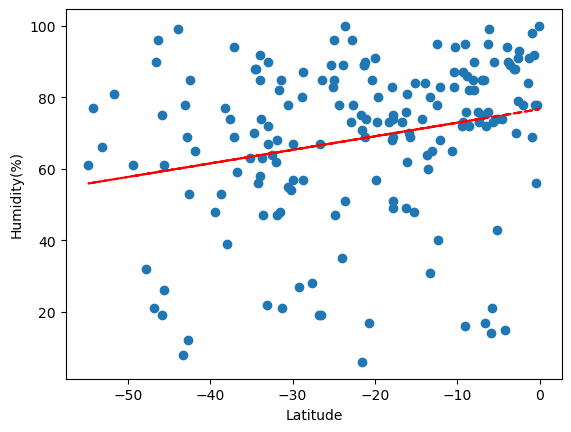

In [63]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],(50, 25))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

**Discussion about the linear relationship:** In both hemispheres, the weak positive correlations indicate that while there may be some relationship between latitude and humidity, it is not strong


### Cloudiness vs. Latitude Linear Regression Plot

The r-value between Lat and Cloudiness is 0.14


Text(0, 0.5, 'Cloudiness(%)')

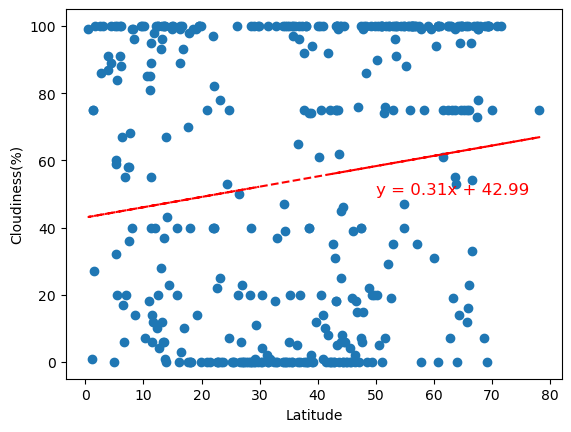

In [39]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],(50, 50))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')


The r-value between Lat and Cloudiness is 0.15


Text(0, 0.5, 'Cloudiness(%)')

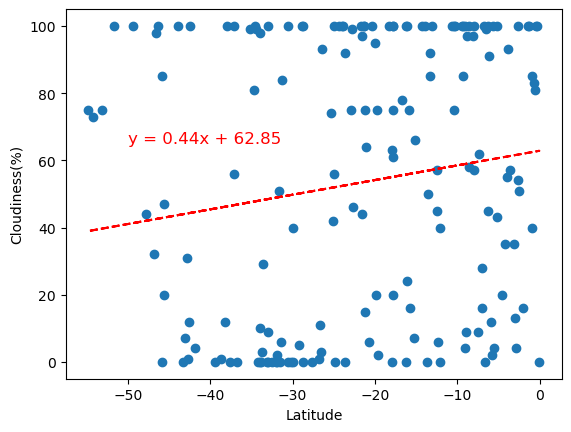

In [40]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],(-50, 65))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

**Discussion about the linear relationship:** In both hemispheres, the weak positive correlations suggest a slight tendency for cloudiness to increase with latitude,but the relationships are weak enough that other factors are likely more influential.


### Wind Speed vs. Latitude Linear Regression Plot

The r-value between Lat and Wind Speed is 0.15


Text(0, 0.5, 'Wind Speed(m/s)')

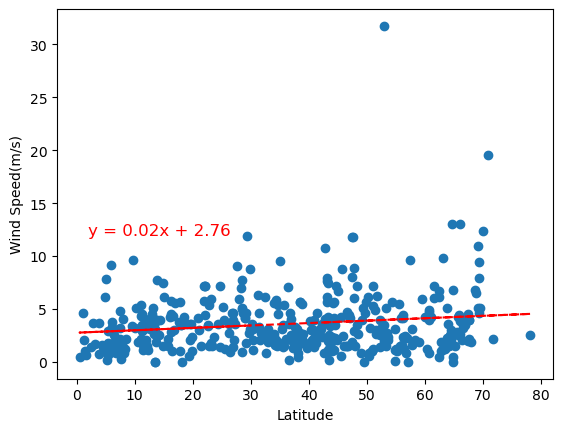

In [52]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],(2, 12))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')

The r-value between Lat and Wind Speed is -0.39


Text(0, 0.5, 'Wind Speed(m/s)')

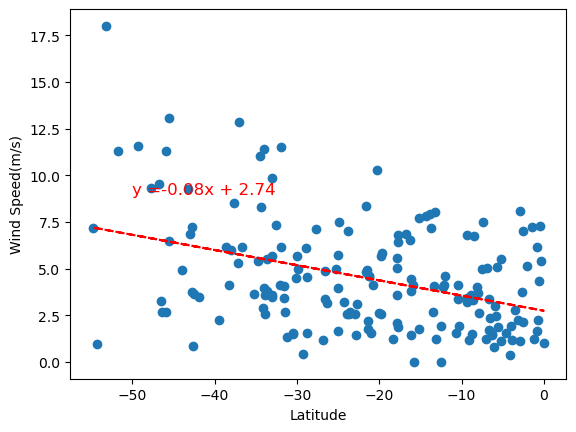

In [53]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],(-50, 9))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')

**The Northern Hemisphere shows a weak positive correlation, while the Southern Hemisphere exhibits a moderate negative correlation between latitude and wind speed. This highlights differing climatic dynamics between the two hemispheres.